In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow import keras
from keras import layers
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [64]:
path = '/content/train.csv'
df = pd.read_csv(path)

In [65]:
del df['Name']
del df['Cabin']
del df['Ticket']

In [66]:
df.fillna(method='ffill', inplace=True)

In [67]:
X = df.drop(columns=['Survived','PassengerId'])
Y = df['Survived']

In [68]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [69]:
scaler = StandardScaler()
X[['Age','Fare']] = scaler.fit_transform(X[['Age','Fare']])

In [70]:
encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])

In [71]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.521198,1,0,-0.502445,2
1,1,0,0.578729,1,0,0.786845,0
2,3,0,-0.246216,0,0,-0.488854,2
3,1,0,0.372493,1,0,0.420730,2
4,3,1,0.372493,0,0,-0.486337,2


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=42)

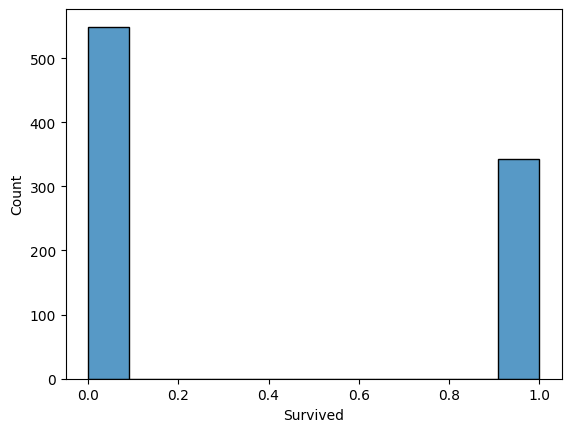

In [167]:
sns.histplot(Y)
plt.show()

#Using Decision Tree Classifier

In [129]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [131]:
accuracy_dtc = accuracy_score(Y_test, Y_pred)
print(accuracy_dtc)

0.7877094972067039


In [144]:
precision_dtc = precision_score(Y_test, Y_pred)
recall_dtc = precision_score(Y_test, Y_pred)
f1_dtc = f1_score(Y_test, Y_pred)
print("precision = ",precision_dtc)
print("recall = ",recall_dtc)
print("f1 score = ",f1_dtc)

precision =  0.7432432432432432
recall =  0.7432432432432432
f1 score =  0.7432432432432431


In [74]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



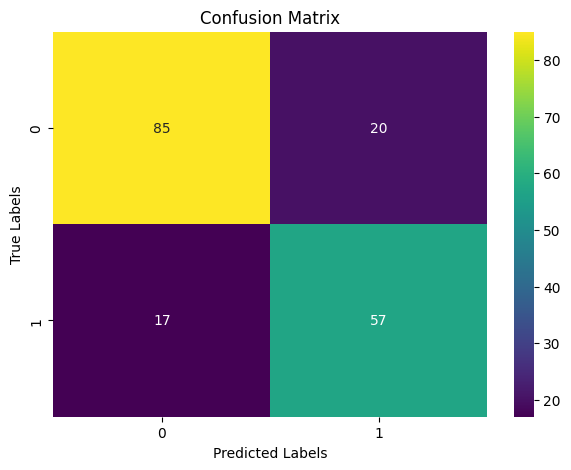

In [76]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


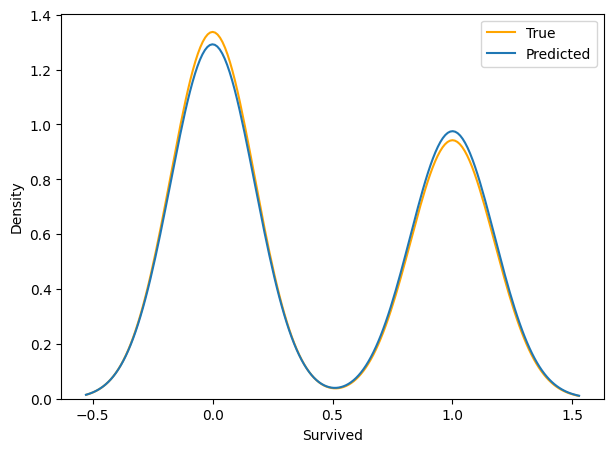

In [110]:
fig, ax = plt.subplots(ncols=1,figsize=(7,5))
sns.kdeplot(Y_test, ax=ax, color='orange')
sns.kdeplot(Y_pred, ax=ax)
plt.legend( labels=['True', 'Predicted'])
plt.show()

# Using a Neural Network with 4 dense layers

In [84]:
NNmodel = keras.Sequential()
NNmodel.add(layers.Input(shape=(X_train.shape[1],)))
NNmodel.add(layers.Dense(128, activation='relu'))
NNmodel.add(layers.Dropout(0.5))
NNmodel.add(layers.Dense(64, activation='relu'))
NNmodel.add(layers.Dropout(0.5))
NNmodel.add(layers.Dense(32, activation='relu'))
NNmodel.add(layers.Dense(1, activation='sigmoid'))
NNmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
NNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1024      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trai

In [88]:
history = NNmodel.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/30
23/23 - 0s - loss: 0.4659 - accuracy: 0.7935 - val_loss: 0.4392 - val_accuracy: 0.8101 - 332ms/epoch - 14ms/step
Epoch 2/30
23/23 - 0s - loss: 0.4744 - accuracy: 0.7978 - val_loss: 0.4402 - val_accuracy: 0.7989 - 205ms/epoch - 9ms/step
Epoch 3/30
23/23 - 0s - loss: 0.4642 - accuracy: 0.8076 - val_loss: 0.4444 - val_accuracy: 0.8101 - 119ms/epoch - 5ms/step
Epoch 4/30
23/23 - 0s - loss: 0.4661 - accuracy: 0.8104 - val_loss: 0.4485 - val_accuracy: 0.8101 - 167ms/epoch - 7ms/step
Epoch 5/30
23/23 - 0s - loss: 0.4536 - accuracy: 0.8132 - val_loss: 0.4445 - val_accuracy: 0.8156 - 128ms/epoch - 6ms/step
Epoch 6/30
23/23 - 0s - loss: 0.4450 - accuracy: 0.8090 - val_loss: 0.4412 - val_accuracy: 0.8101 - 147ms/epoch - 6ms/step
Epoch 7/30
23/23 - 0s - loss: 0.4577 - accuracy: 0.8062 - val_loss: 0.4453 - val_accuracy: 0.8156 - 136ms/epoch - 6ms/step
Epoch 8/30
23/23 - 0s - loss: 0.4523 - accuracy: 0.8062 - val_loss: 0.4434 - val_accuracy: 0.8101 - 119ms/epoch - 5ms/step
Epoch 9/30
23/2

In [140]:
y_pred = (NNmodel.predict(X_test) > 0.5).astype(int)

accuracyN = accuracy_score(Y_test, y_pred)
precisionN = precision_score(Y_test, y_pred)
recallN = recall_score(Y_test, y_pred)
f1N = f1_score(Y_test, y_pred)
print(f"Accuracy: {accuracyN:.4f}")
print(f"Precision: {precisionN:.4f}")
print(f"Recall: {recallN:.4f}")
print(f"F1-Score: {f1N:.4f}")

6/6 [==============================] - 0s 3ms/step
Accuracy: 0.8156
Precision: 0.8060
Recall: 0.7297
F1-Score: 0.7660


In [90]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [141]:
y_pred = y_pred.reshape(179)

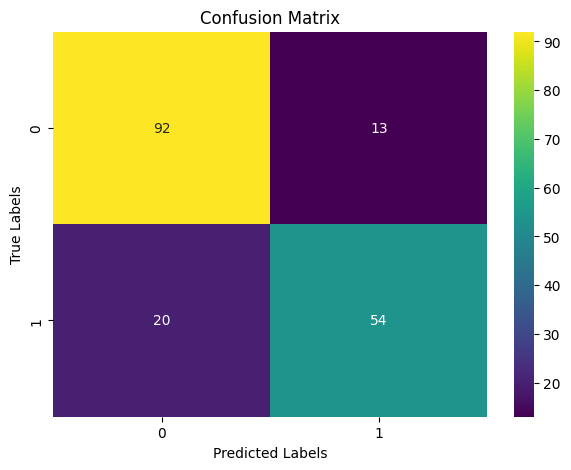

In [142]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

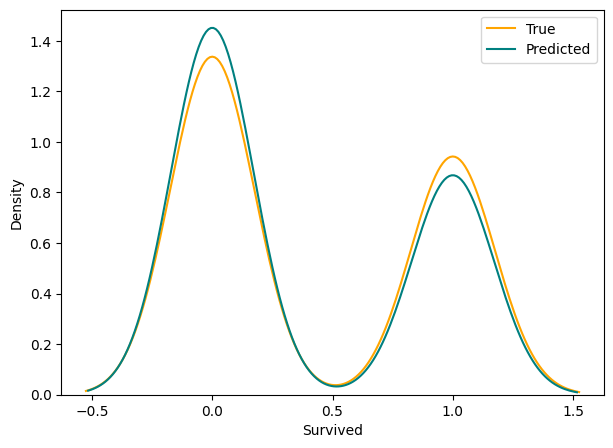

In [143]:
fig, ax = plt.subplots(ncols=1,figsize=(7,5))
sns.kdeplot(Y_test, ax=ax, color='orange')
sns.kdeplot(y_pred, ax=ax, color='teal')
plt.legend( labels=['True', 'Predicted'])
plt.show()

# Using support vector machine

In [112]:
svmModel = SVC(gamma='auto')

In [113]:
svmModel.fit(X_train, Y_train)

SVC(gamma='auto')

In [134]:
y_svm = svmModel.predict(X_test)

In [136]:
accuracy_svm = accuracy_score(Y_test, y_svm)
print(accuracy_svm)

0.8156424581005587


In [145]:
precision_svm = precision_score(Y_test, y_svm)
recall_svm = precision_score(Y_test, y_svm)
f1_svm = f1_score(Y_test, y_svm)
print("precision = ",precision_svm)
print("recall = ",recall_svm)
print("f1 score = ",f1_svm)

precision =  0.7971014492753623
recall =  0.7971014492753623
f1 score =  0.7692307692307693


In [116]:
print(classification_report(Y_test, y_svm))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



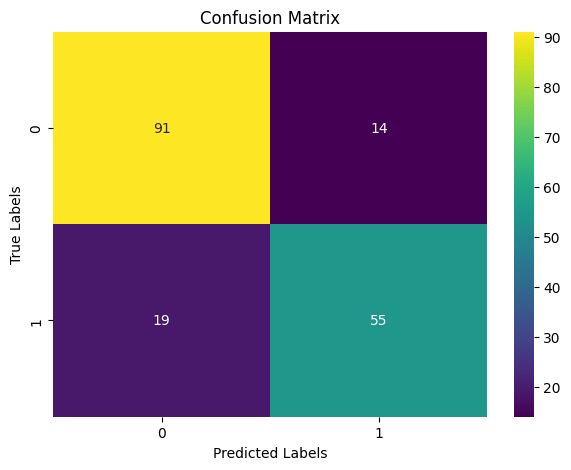

In [138]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(Y_test, y_svm)
sns.heatmap(cm, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

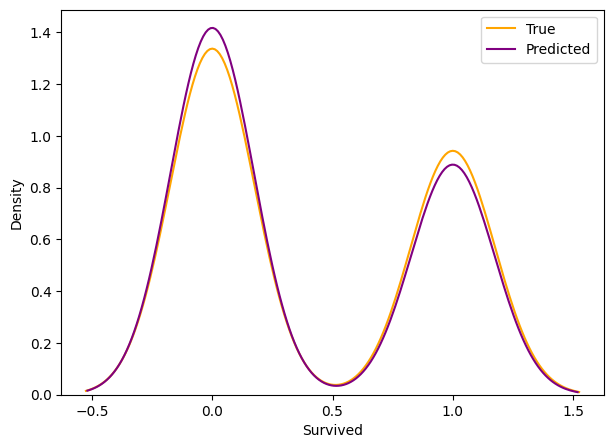

In [137]:
fig, ax = plt.subplots(ncols=1,figsize=(7,5))
sns.kdeplot(Y_test, ax=ax, color='orange')
sns.kdeplot(y_svm, ax=ax, color='purple')
plt.legend( labels=['True', 'Predicted'])
plt.show()

# Summary


### we have used 3 models : Decision Tree, Neural Network and SVM

In [163]:
models = ['DTC', 'DNN', 'SVM']
model_colors = ['teal', 'mediumslateblue', 'tab:orange']
accuracy_scores = [accuracy_dtc, accuracyN, accuracy_svm]
precision_scores = [precision_dtc, precisionN, precision_svm]
recall_scores = [recall_dtc, recallN, recall_svm]
f1_scores = [f1_dtc, f1N, f1_svm]

In [168]:
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

### Comparing Our Models


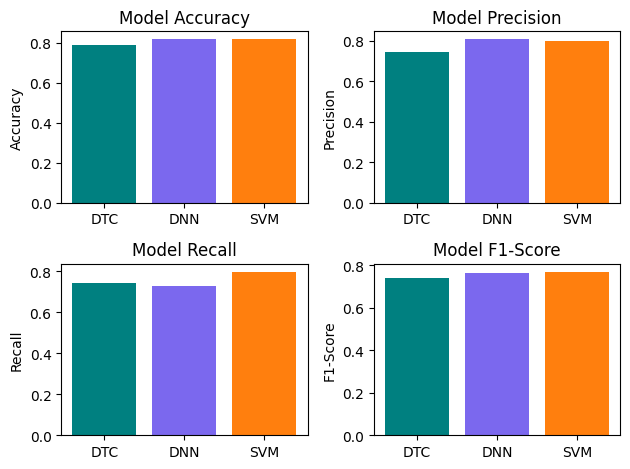

In [169]:
# Accuracy
plt.subplot(2, 2, 1)
plt.bar(models, accuracy_scores, color = model_colors)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

# Precision
plt.subplot(2, 2, 2)
plt.bar(models, precision_scores, color = model_colors)
plt.ylabel('Precision')
plt.title('Model Precision')

# Recall
plt.subplot(2, 2, 3)
plt.bar(models, recall_scores, color = model_colors)
plt.ylabel('Recall')
plt.title('Model Recall')

# F1-Score
plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color = model_colors)
plt.ylabel('F1-Score')
plt.title('Model F1-Score')

plt.tight_layout()
plt.show()

## Making Predicting for the test dataet using the SVM model

In [170]:
testdf = pd.read_csv('/content/test.csv')

In [172]:
del testdf['Name']
del testdf['Cabin']
del testdf['Ticket']

In [174]:
testdf.fillna(method='ffill', inplace=True)

In [175]:
test_x = testdf.drop(columns=['PassengerId'])

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [179]:
test_x[['Age','Fare']] = scaler.fit_transform(test_x[['Age','Fare']])
test_x['Sex'] = encoder.fit_transform(test_x['Sex'])
test_x['Embarked'] = encoder.fit_transform(test_x['Embarked'])

In [180]:
test_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.314998,0,0,-0.497071,1
1,3,0,1.214994,1,0,-0.511934,2
2,2,1,2.294989,0,0,-0.463762,1
3,3,1,-0.224999,0,0,-0.482135,2
4,3,0,-0.584997,1,1,-0.417159,2


In [181]:
my_preds = svmModel.predict(test_x)

In [182]:
testdf['Survived'] = my_preds

In [184]:
del testdf['Age']
del testdf['Pclass']
del testdf['Sex']
del testdf['SibSp']
del testdf['Parch']
del testdf['Fare']
del testdf['Embarked']

In [185]:
testdf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [186]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [187]:
testdf.to_csv('/content/drive/MyDrive/models/titanic_kaggle.csv')

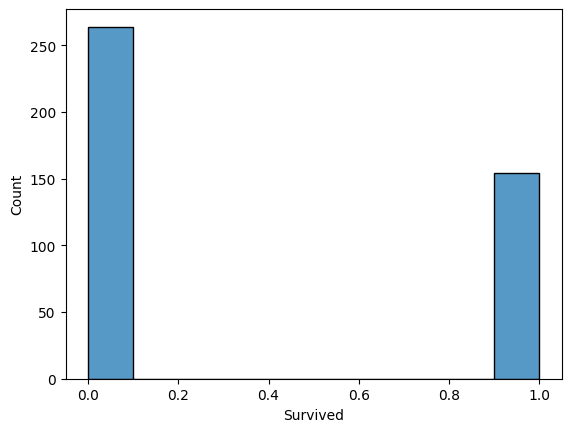

In [192]:
sns.histplot(testdf['Survived'])
plt.show()